In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from skimage import color, transform, restoration, io, feature
from google.colab import files
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_model = tf.keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.
base_model.trainable = False

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
inputs = tf.keras.Input(shape=(150, 150, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
x = tf.keras.layers.Flatten()(x)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
# A Dense classifier with a single unit (binary classification)
outputs = tf.keras.layers.Dense(4,activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3276864   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0     

In [ ]:
    batch_size = 64  # number of training samples used at a time to update the weights
    nb_classes = 4    # number of output possibilities: [0 - 9] KEEP
    nb_epoch = 4       # number of passes through the entire train dataset before weights "final"
    img_rows, img_cols = 150, 150   # the size of the MNIST images KEEP
    input_shape = (img_rows, img_cols, 3)   # 1 channel image input (grayscale) KEEP
    nb_filters = 32    # number of convolutional filters to use
    pool_size = (2, 2)  # pooling decreases image size, reduces computation, adds translational invariance
    kernel_size = (3, 3)  # convolutional kernel size, slides over image to learn features

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.25,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/colab pictures/animal_JPEGImages',
        target_size=(150, 150),
        batch_size=batch_size,
        subset='training',
        class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/colab pictures/animal_JPEGImages',
        target_size=(150, 150),
        batch_size=batch_size,
        subset='validation',
        class_mode='categorical')





Found 28060 images belonging to 4 classes.
Found 9352 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/colab pictures/temp',
        target_size=(150, 150),
        batch_size=205,
        class_mode='categorical')

Found 205 images belonging to 4 classes.


In [ ]:
further_test_datagen = ImageDataGenerator(rescale=1./255)
further_test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/colab pictures/further_test',
        target_size=(150, 150),
        batch_size=213,
        class_mode='categorical')

Found 213 images belonging to 4 classes.


In [ ]:
extra_test_datagen = ImageDataGenerator(rescale=1./255)
extra_test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/colab pictures/extra_test',
        target_size=(150, 150),
        batch_size=27,
        class_mode='categorical')

Found 28 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

save_checkpoint= ModelCheckpoint('/content/drive/MyDrive/colab pictures/callback_list/checkpoint',monitor='val_accuracy',verbose=1,save_best_only=True)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
estop=EarlyStopping(monitor='val_accuracy',patience=8)

In [ ]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
#model=tf.keras.models.load_model('/content/drive/MyDrive/colab pictures/callback_list/checkpoint')

In [ ]:
nb_epoch = 30      # number of passes through the entire train dataset before weights "final"

history = model.fit(train_generator,steps_per_epoch=430 , epochs=nb_epoch, verbose=1,validation_steps=50,validation_data=validation_generator,  callbacks=[save_checkpoint,estop])

Epoch 1/30
430/430 [==============================] - 10538s 25s/step - loss: 0.6240 - accuracy: 0.7429 - val_loss: 0.9583 - val_accuracy: 0.6637

Epoch 00001: val_accuracy improved from -inf to 0.66375, saving model to /content/drive/MyDrive/colab pictures/callback_list/checkpoint


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/colab pictures/callback_list/checkpoint/assets
Epoch 2/30
430/430 [==============================] - 1778s 4s/step - loss: 0.6045 - accuracy: 0.7598 - val_loss: 0.9297 - val_accuracy: 0.6488

Epoch 00002: val_accuracy did not improve from 0.66375
Epoch 3/30
302/430 [====================>.........] - ETA: 3:50 - loss: 0.5945 - accuracy: 0.7623

In [ ]:
save_checkpoint_balance= ModelCheckpoint('/content/drive/MyDrive/colab pictures/callback_list/balanced_classifier_checkpoint',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
balanced_train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.25,
        horizontal_flip=True)
balanced_train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/colab pictures/balanced_animal_JPEGImages',
        target_size=(150, 150),
        batch_size=batch_size,
        subset='training',
        class_mode='categorical')
balanced_validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/colab pictures/balanced_animal_JPEGImages',
        target_size=(150, 150),
        batch_size=batch_size,
        subset='validation',
        class_mode='categorical')


Found 12213 images belonging to 4 classes.
Found 4070 images belonging to 4 classes.


In [ ]:
model_b = tf.keras.Model(inputs, outputs)

In [ ]:
model_b.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model_b.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3276864   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0   

In [ ]:
#model_b=tf.keras.models.load_model('/content/drive/MyDrive/colab pictures/savelist/balanced_classifier_checkpoint/balanced_classifier_checkpoint')

In [ ]:
nb_epoch = 30      # number of passes through the entire train dataset before weights "final"

history_b = model_b.fit(balanced_train_generator,steps_per_epoch=185 , epochs=nb_epoch, verbose=1,validation_steps=30,validation_data=balanced_validation_generator,  callbacks=[save_checkpoint_balance,estop])

Epoch 1/30
185/185 [==============================] - 6096s 33s/step - loss: 1.4771 - accuracy: 0.3585 - val_loss: 1.3141 - val_accuracy: 0.3495

Epoch 00001: val_accuracy improved from -inf to 0.34948, saving model to /content/drive/MyDrive/colab pictures/callback_list/balanced_classifier_checkpoint


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/colab pictures/callback_list/balanced_classifier_checkpoint/assets
Epoch 2/30
185/185 [==============================] - 875s 5s/step - loss: 1.2968 - accuracy: 0.3399 - val_loss: 1.2880 - val_accuracy: 0.3417

Epoch 00002: val_accuracy did not improve from 0.34948
Epoch 3/30
185/185 [==============================] - 532s 3s/step - loss: 1.2482 - accuracy: 0.3673 - val_loss: 1.3163 - val_accuracy: 0.3302

Epoch 00003: val_accuracy did not improve from 0.34948
Epoch 4/30
185/185 [==============================] - 471s 3s/step - loss: 1.2452 - accuracy: 0.3689 - val_loss: 1.1902 - val_accuracy: 0.4349

Epoch 00004: val_accuracy improved from 0.34948 to 0.43490, saving model to /content/drive/MyDrive/colab pictures/callback_list/balanced_classifier_checkpoint


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/colab pictures/callback_list/balanced_classifier_checkpoint/assets
Epoch 5/30
185/185 [==============================] - 429s 2s/step - loss: 1.2120 - accuracy: 0.3820 - val_loss: 1.1649 - val_accuracy: 0.4219

Epoch 00005: val_accuracy did not improve from 0.43490
Epoch 6/30
185/185 [==============================] - 396s 2s/step - loss: 1.1893 - accuracy: 0.3843 - val_loss: 1.1605 - val_accuracy: 0.4568

Epoch 00006: val_accuracy improved from 0.43490 to 0.45677, saving model to /content/drive/MyDrive/colab pictures/callback_list/balanced_classifier_checkpoint


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/colab pictures/callback_list/balanced_classifier_checkpoint/assets
Epoch 7/30
185/185 [==============================] - 387s 2s/step - loss: 1.1823 - accuracy: 0.3963 - val_loss: 1.1869 - val_accuracy: 0.4255

Epoch 00007: val_accuracy did not improve from 0.45677
Epoch 8/30
185/185 [==============================] - 379s 2s/step - loss: 1.1785 - accuracy: 0.3948 - val_loss: 1.1971 - val_accuracy: 0.4052

Epoch 00008: val_accuracy did not improve from 0.45677
Epoch 9/30
185/185 [==============================] - 348s 2s/step - loss: 1.1542 - accuracy: 0.4107 - val_loss: 1.2480 - val_accuracy: 0.3484

Epoch 00009: val_accuracy did not improve from 0.45677
Epoch 10/30
185/185 [==============================] - 350s 2s/step - loss: 1.1603 - accuracy: 0.3931 - val_loss: 1.2089 - val_accuracy: 0.3781

Epoch 00010: val_accuracy did not improve from 0.45677
Epoch 11/30
185/185 [==============================] - 353s 2s/step - loss: 1.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/colab pictures/callback_list/balanced_classifier_checkpoint/assets
Epoch 14/30
185/185 [==============================] - 372s 2s/step - loss: 1.1197 - accuracy: 0.4541 - val_loss: 1.1540 - val_accuracy: 0.4193

Epoch 00014: val_accuracy did not improve from 0.47917
Epoch 15/30
185/185 [==============================] - 388s 2s/step - loss: 1.1223 - accuracy: 0.4552 - val_loss: 1.1817 - val_accuracy: 0.4844

Epoch 00015: val_accuracy improved from 0.47917 to 0.48438, saving model to /content/drive/MyDrive/colab pictures/callback_list/balanced_classifier_checkpoint


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/colab pictures/callback_list/balanced_classifier_checkpoint/assets
Epoch 16/30
185/185 [==============================] - 350s 2s/step - loss: 1.1142 - accuracy: 0.4595 - val_loss: 1.1715 - val_accuracy: 0.4604

Epoch 00016: val_accuracy did not improve from 0.48438
Epoch 17/30
185/185 [==============================] - 334s 2s/step - loss: 1.1038 - accuracy: 0.4631 - val_loss: 1.1531 - val_accuracy: 0.4635

Epoch 00017: val_accuracy did not improve from 0.48438
Epoch 18/30
185/185 [==============================] - 341s 2s/step - loss: 1.0914 - accuracy: 0.4789 - val_loss: 1.1688 - val_accuracy: 0.4594

Epoch 00018: val_accuracy did not improve from 0.48438
Epoch 19/30
185/185 [==============================] - 346s 2s/step - loss: 1.1054 - accuracy: 0.4724 - val_loss: 1.1975 - val_accuracy: 0.4104

Epoch 00019: val_accuracy did not improve from 0.48438
Epoch 20/30
185/185 [==============================] - 363s 2s/step - loss:

In [ ]:
evaluate_a1= model.evaluate(test_generator)

1/1 [==============================] - 4s 4s/step - loss: 0.7636 - accuracy: 0.7463


In [ ]:
evaluate_a2= model.evaluate(further_test_generator)

1/1 [==============================] - 3s 3s/step - loss: 0.8180 - accuracy: 0.7183


In [ ]:
evaluate_a3= model.evaluate(extra_test_generator)

2/2 [==============================] - 1s 69ms/step - loss: 2.2003 - accuracy: 0.1786


In [ ]:
next(train_generator)[0].shape

(64, 150, 150, 3)

In [ ]:
plt.imshow(next(train_generator)[0][0])

In [ ]:
test_image1,test_value1=next(test_generator)

In [ ]:
test_image2,test_value2=next(further_test_generator)

In [ ]:
test_image3,test_value3=next(extra_test_generator)

In [ ]:
test_pred1=model.predict(test_image1)

In [ ]:
test_pred2=model.predict(test_image2)

In [ ]:
test_pred3=model.predict(test_image3)

In [ ]:
np.argmax(test_pred1,axis=1)

array([2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 3, 3, 1, 1, 2, 2, 1, 3, 1, 2, 2,
       0, 2, 3, 2, 2, 1, 1, 1, 3, 3, 0, 2, 2, 3, 2, 3, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 1, 2, 0, 1, 3, 0, 2, 3,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 3, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0,
       1, 2, 3, 0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 2, 3, 3,
       2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 0, 1, 1,
       1, 3, 1, 3, 1, 0, 2, 0, 2, 1, 2, 3, 2, 0, 2, 2, 1, 0, 2, 2, 2, 3,
       1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1, 0, 3, 1, 1, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 3, 1, 2, 0, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 3, 2,
       1, 2, 0, 2, 2, 3, 1])

In [ ]:
np.argmax(test_value1,axis=1)

array([2, 0, 2, 1, 3, 0, 1, 3, 1, 2, 1, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 3,
       0, 3, 3, 2, 2, 1, 1, 3, 0, 3, 0, 0, 2, 3, 3, 3, 2, 2, 1, 0, 1, 2,
       2, 2, 2, 1, 3, 1, 2, 2, 2, 2, 3, 2, 2, 3, 1, 2, 0, 2, 3, 0, 2, 3,
       0, 2, 3, 2, 2, 3, 2, 2, 2, 3, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0,
       3, 2, 3, 0, 1, 1, 1, 0, 2, 3, 1, 0, 0, 1, 3, 2, 1, 1, 2, 2, 3, 3,
       2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1,
       2, 3, 1, 3, 1, 0, 2, 0, 2, 1, 2, 3, 2, 0, 2, 2, 1, 2, 3, 2, 2, 3,
       1, 2, 3, 2, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 3, 1, 0, 0, 2, 1, 1, 3,
       2, 2, 2, 3, 3, 3, 1, 1, 0, 2, 1, 0, 3, 2, 2, 3, 1, 2, 2, 2, 3, 0,
       1, 2, 0, 2, 2, 3, 1])

In [ ]:
confusion_matrix(np.argmax(test_value1,axis=1),np.argmax(test_pred1,axis=1))

array([[26,  1, 10,  3],
       [ 0, 45,  2,  0],
       [ 1, 11, 63,  0],
       [ 0, 10, 11, 22]])

In [ ]:
np.argmax(test_pred,axis=1)

array([2, 1, 3, 3, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 2, 2,
       2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 3, 1, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 0, 1, 2, 3, 2, 2, 1,
       0, 1, 0, 2, 3, 3, 1, 2, 3, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 3, 1, 2, 2, 3, 1, 3, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 3, 2, 1, 2, 2, 3, 0, 1, 2, 0, 1, 3, 2, 0,
       1, 3, 1, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 3, 0, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 2, 2, 0, 3, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2,
       0, 1, 3, 2, 2, 2, 3, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 3, 1, 2, 3,
       2, 1, 2, 0, 2, 2, 3, 0, 2, 2, 2, 2, 3, 2, 2])

In [ ]:
np.argmax(test_value,axis=1)

array([2, 1, 0, 3, 0, 0, 3, 0, 0, 1, 3, 1, 2, 2, 1, 2, 3, 1, 1, 3, 2, 0,
       2, 1, 2, 2, 0, 2, 2, 1, 3, 1, 2, 2, 0, 1, 2, 3, 1, 3, 2, 3, 2, 0,
       2, 2, 3, 0, 0, 1, 2, 0, 1, 2, 2, 2, 2, 3, 2, 0, 1, 2, 3, 2, 0, 1,
       0, 2, 0, 2, 0, 3, 2, 2, 3, 2, 1, 2, 1, 2, 0, 1, 3, 0, 0, 1, 0, 2,
       2, 2, 1, 2, 1, 2, 3, 1, 2, 2, 0, 2, 2, 3, 3, 1, 2, 3, 0, 3, 1, 2,
       1, 1, 2, 0, 1, 2, 1, 0, 3, 2, 3, 2, 2, 3, 0, 1, 2, 0, 1, 3, 2, 0,
       1, 3, 1, 2, 3, 0, 0, 1, 0, 1, 2, 0, 3, 2, 1, 3, 0, 3, 3, 2, 1, 1,
       3, 3, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 3, 2, 1, 3, 2, 3, 1, 2, 2,
       0, 1, 3, 2, 2, 2, 3, 3, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 3, 1, 0, 3,
       2, 1, 2, 0, 3, 1, 3, 0, 1, 2, 2, 2, 3, 2, 2])

In [ ]:
confusion_matrix(np.argmax(test_value2,axis=1),np.argmax(test_pred2,axis=1))

array([[26,  3, 12,  3],
       [ 0, 45,  6,  0],
       [ 1, 11, 63,  0],
       [ 0, 10, 11, 22]])

In [ ]:
confusion_matrix(np.argmax(test_value3,axis=1),np.argmax(test_pred3,axis=1))

array([[ 0, 10,  8,  1],
       [ 0,  0,  3,  0],
       [ 0,  0,  4,  0],
       [ 0,  0,  0,  1]])

In [ ]:
evaluate_b1= model_b.evaluate(test_generator)

1/1 [==============================] - 4s 4s/step - loss: 0.6503 - accuracy: 0.7902


In [ ]:
evaluate_b2= model_b.evaluate(further_test_generator)

1/1 [==============================] - 3s 3s/step - loss: 0.7003 - accuracy: 0.7746


In [ ]:
evaluate_b3= model_b.evaluate(extra_test_generator)

2/2 [==============================] - 1s 93ms/step - loss: 2.1344 - accuracy: 0.3214


In [ ]:
test_pred_b1=model_b.predict(test_image1)

In [ ]:
test_pred_b2=model_b.predict(test_image2)

In [ ]:
confusion_matrix(np.argmax(test_value2,axis=1),np.argmax(test_pred_b1,axis=1))

array([[35,  2,  2,  1],
       [ 1, 44,  2,  0],
       [ 7, 11, 55,  2],
       [ 0,  6,  1, 36]])

In [ ]:
confusion_matrix(np.argmax(test_value,axis=1),np.argmax(test_pred_b2,axis=1))

array([[35,  3,  4,  2],
       [ 1, 47,  2,  1],
       [ 7, 11, 55,  2],
       [ 0,  6,  1, 36]])

In [ ]:
test_pred_b3=model_b.predict(test_image3)

In [ ]:
confusion_matrix(np.argmax(test_value3,axis=1),np.argmax(test_pred_b3,axis=1))

array([[ 3, 11,  2,  3],
       [ 1,  1,  1,  0],
       [ 0,  0,  4,  0],
       [ 0,  0,  0,  1]])

In [ ]:
save_checkpoint2= ModelCheckpoint('/content/drive/MyDrive/colab pictures/callback_list/checkpoint2',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
train_datagen_cae = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.25,
        horizontal_flip=True)
train_generator_cae = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/colab pictures/animal_JPEGImages',
        target_size=(148, 148),
        batch_size=batch_size,
        subset='training',
        class_mode='input',
        color_mode='rgb')
validation_generator_cae = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/colab pictures/animal_JPEGImages',
        target_size=(148, 148),
        batch_size=batch_size,
        subset='validation',
        class_mode='input',
        color_mode='rgb')

Found 28060 images belonging to 4 classes.
Found 9352 images belonging to 4 classes.


In [ ]:
cae_b_train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.25,
        horizontal_flip=True)
cae_b_train_generator_cae = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/colab pictures/balanced_animal_JPEGImages',
        target_size=(148, 148),
        batch_size=batch_size,
        subset='training',
        class_mode='input',
        color_mode='rgb')
cae_b_validation_generator_cae = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/colab pictures/balanced_animal_JPEGImages',
        target_size=(148, 148),
        batch_size=batch_size,
        subset='validation',
        class_mode='input',
        color_mode='rgb')

Found 12213 images belonging to 4 classes.
Found 4070 images belonging to 4 classes.


In [ ]:
paired_datagen = ImageDataGenerator(rescale=1./255)
paired_generator = paired_datagen.flow_from_directory(
        '/content/drive/MyDrive/colab pictures/paired',
        target_size=(148, 148),
        batch_size=5,
        class_mode='input',
        color_mode='rgb')

Found 5 images belonging to 1 classes.


In [ ]:
conv_encoder = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu",input_shape=(148, 148,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = tf.keras.models.Sequential([
    tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[18, 18, 64]),
    tf.keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    tf.keras.layers.Conv2DTranspose(3, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    tf.keras.layers.Reshape([148,148,3])
])
conv_ae = tf.keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
                metrics=['accuracy'])
#history_cae = conv_ae.fit(train_generator_cae,steps_per_epoch=50 , epochs=5, verbose=1,validation_steps=50,validation_data=validation_generator,  callbacks=[save_checkpoint2,estop])

In [ ]:
#conv_ae=tf.keras.models.load_model('/content/drive/MyDrive/colab pictures/savelist/checkpoint2')

In [ ]:
history_cae = conv_ae.fit(train_generator_cae,steps_per_epoch=430, epochs=30, verbose=1,validation_steps=50,validation_data=validation_generator_cae,  callbacks=[save_checkpoint2,estop])

In [ ]:
result_pair=conv_ae.layers[0].predict(paired_generator)
result_pair.shape

(5, 18, 18, 64)

In [ ]:
result_pair_AE=conv_ae.predict(paired_generator)

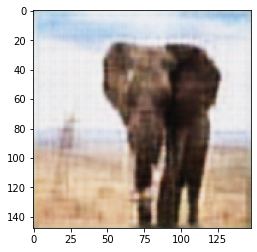

In [ ]:
plt.imshow((result_pair_AE)[0])

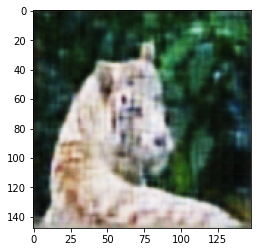

In [ ]:
plt.imshow((result_pair_AE)[1])

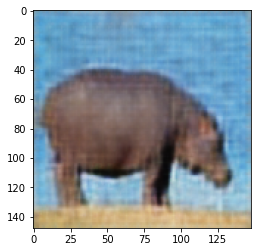

In [ ]:
plt.imshow((result_pair_AE)[2])

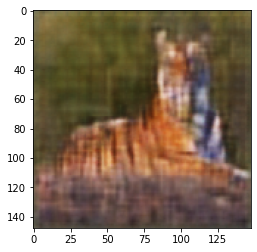

In [ ]:
plt.imshow((result_pair_AE)[3])

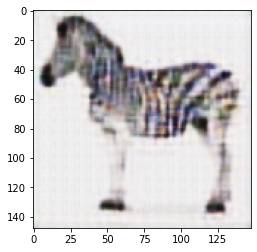

In [ ]:
plt.imshow((result_pair_AE)[4])

In [ ]:
result_flatten=result_pair.reshape(5,-1)
result_flatten.shape

(5, 20736)

In [ ]:
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
result_cosine= cosine_similarity(result_flatten)

In [ ]:
result_cosine

array([[ 0.9999998 ,  0.3863404 ,  0.44925395,  0.19200514,  0.18067183],
       [ 0.3863404 ,  1.0000017 ,  0.5298634 , -0.12413775,  0.00472523],
       [ 0.44925395,  0.5298634 ,  0.9999992 , -0.03792206,  0.01196723],
       [ 0.19200514, -0.12413775, -0.03792206,  0.9999998 ,  0.28640145],
       [ 0.18067183,  0.00472523,  0.01196723,  0.28640145,  1.0000007 ]],
      dtype=float32)

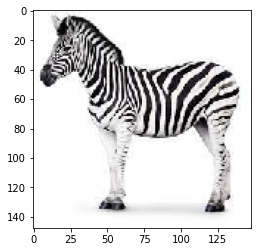

In [ ]:
plt.imshow((paired_generator)[0][0][0])

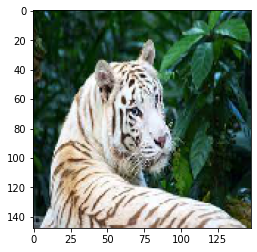

In [ ]:
plt.imshow((paired_generator)[0][0][1])

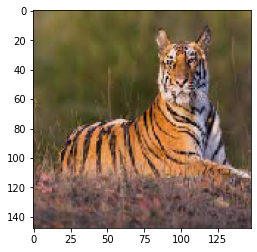

In [ ]:
plt.imshow((paired_generator)[0][0][2])

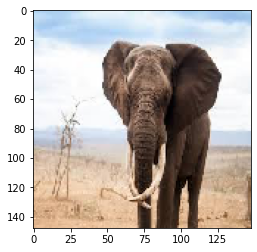

In [ ]:
plt.imshow((paired_generator)[0][0][3])

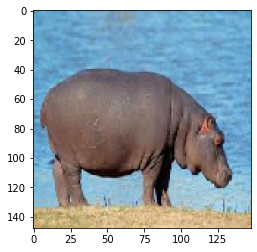

In [ ]:
plt.imshow((paired_generator)[0][0][4])

In [ ]:
conv_encoder_b = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu",input_shape=(148, 148,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder_b = tf.keras.models.Sequential([
    tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[18, 18, 64]),
    tf.keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    tf.keras.layers.Conv2DTranspose(3, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    tf.keras.layers.Reshape([148,148,3])
])

In [ ]:
conv_ae_b = tf.keras.models.Sequential([conv_encoder_b, conv_decoder_b])

In [ ]:
conv_ae_b.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
                metrics=['accuracy'])

In [ ]:
save_checkpoint_balanced_cae= ModelCheckpoint('/content/drive/MyDrive/colab pictures/callback_list/checkpoint_cae_balanced',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
history_cae_b = conv_ae.fit(cae_b_train_generator_cae,steps_per_epoch=185, epochs=30, verbose=1,validation_steps=30, validation_data=cae_b_validation_generator_cae,  callbacks=[save_checkpoint_balanced_cae,estop])

Epoch 1/30
185/185 [==============================] - 372s 2s/step - loss: 0.5682 - accuracy: 0.8128 - val_loss: 0.5681 - val_accuracy: 0.8219

Epoch 00001: val_accuracy improved from -inf to 0.82193, saving model to /content/drive/MyDrive/colab pictures/callback_list/checkpoint_cae_balanced
INFO:tensorflow:Assets written to: /content/drive/MyDrive/colab pictures/callback_list/checkpoint_cae_balanced/assets
Epoch 2/30
185/185 [==============================] - 382s 2s/step - loss: 0.5676 - accuracy: 0.8172 - val_loss: 0.5683 - val_accuracy: 0.8244

Epoch 00002: val_accuracy improved from 0.82193 to 0.82443, saving model to /content/drive/MyDrive/colab pictures/callback_list/checkpoint_cae_balanced
INFO:tensorflow:Assets written to: /content/drive/MyDrive/colab pictures/callback_list/checkpoint_cae_balanced/assets
Epoch 3/30
185/185 [==============================] - 380s 2s/step - loss: 0.5678 - accuracy: 0.8171 - val_loss: 0.5668 - val_accuracy: 0.8261

Epoch 00003: val_accuracy impro